In [3]:
# Configuring the path of Kaggle.json file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c playground-series-s5e6

  0% 0.00/11.7M [00:00<?, ?B/s]
100% 11.7M/11.7M [00:00<00:00, 1.02GB/s]


In [4]:

# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = 'playground-series-s5e6.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')
  del zip

The data set has been extracted.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [9]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [11]:
df.isnull().sum()

,0
id,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [14]:
df.drop('id', axis=1, inplace=True)
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [22]:
numeric = df.describe().columns.tolist()
cat_cols=list(set(df.columns.tolist())-set(numerical))

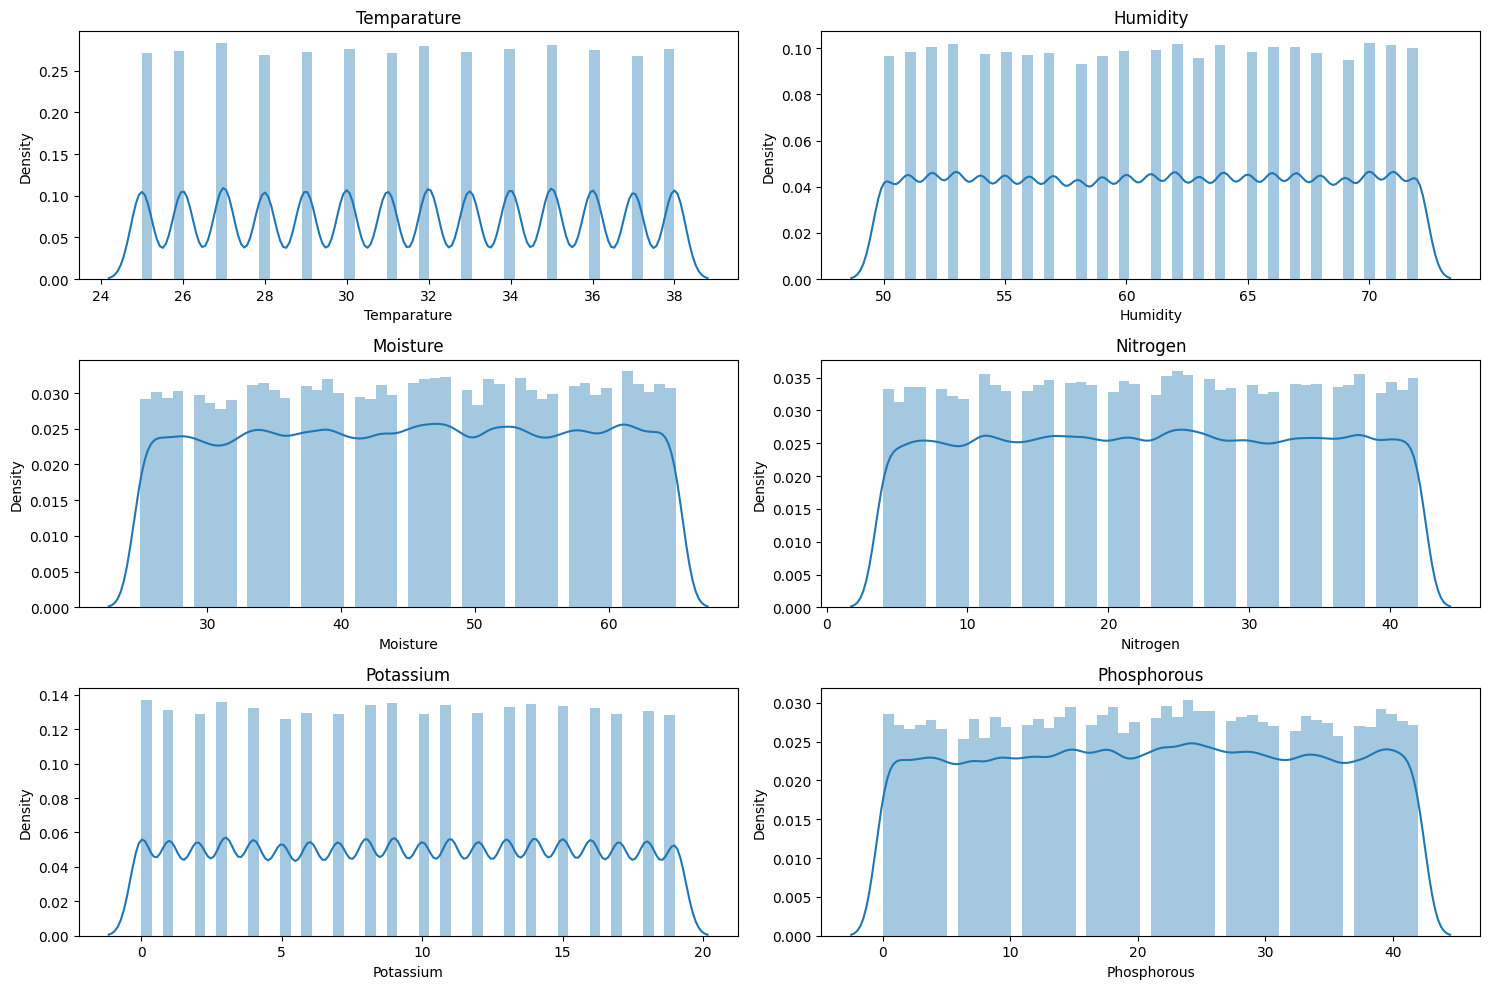

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axes = axes.flatten()
for ax, col in zip(axes, numeric):
    sb.distplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

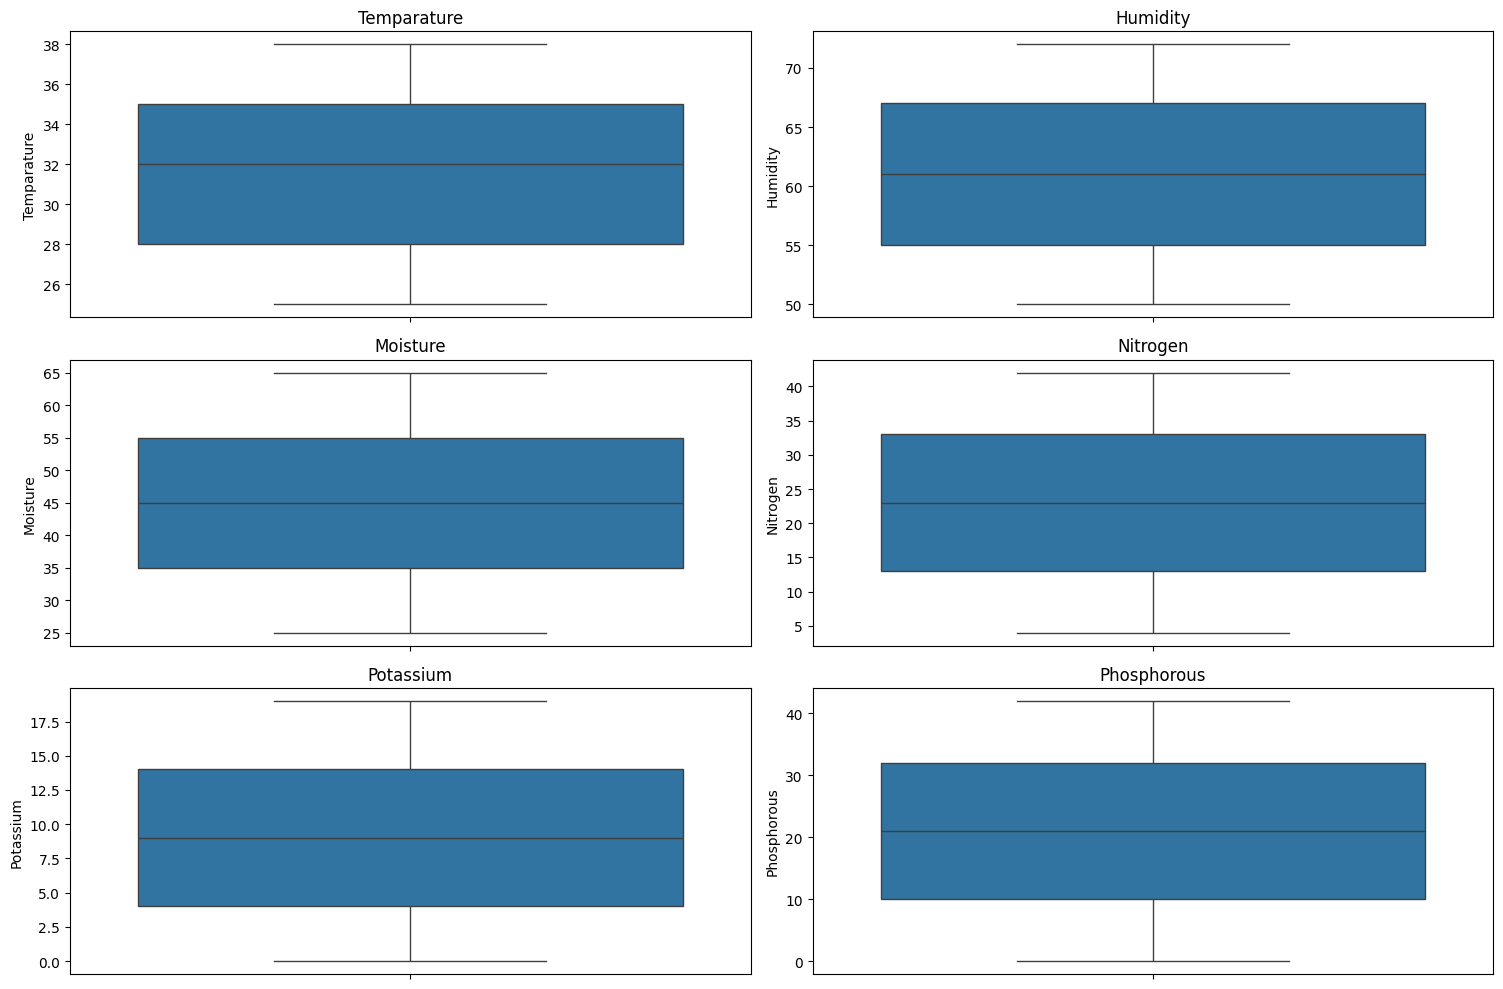

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axes = axes.flatten()
for ax, col in zip(axes, numeric):
    sb.boxplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [26]:
for cat in cat_cols:
  print(df[cat].value_counts())
  print()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64

Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64



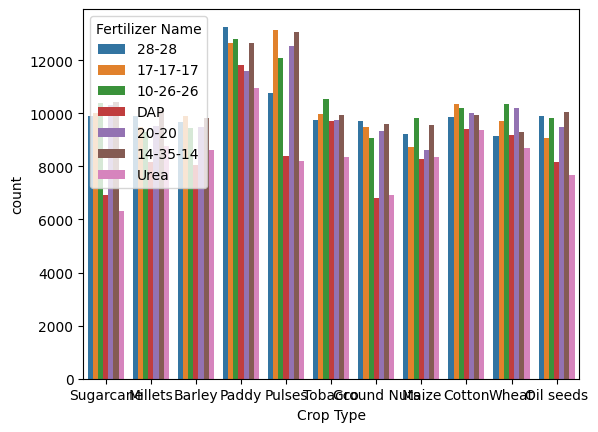

In [27]:
sb.countplot(data=df, x='Crop Type', hue='Fertilizer Name')
plt.show()

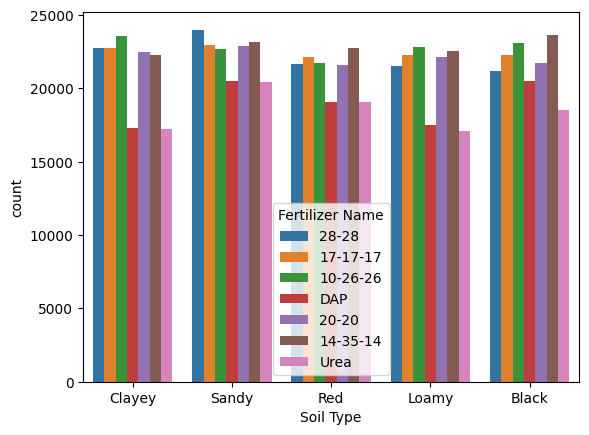

In [28]:
sb.countplot(data=df, x='Soil Type', hue='Fertilizer Name')
plt.show()

In [30]:
# one hot encoding
column_name=['Crop Type','Soil Type']
def one_hot_encode(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column_name, axis=1, inplace=True)
    return df

df = one_hot_encode(df, column_name)

In [32]:
fert_dict = {label:i for i, label in enumerate(df["Fertilizer Name"].unique())}
df['Fertilizer Name'] =df["Fertilizer Name"].map(fert_dict)
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,37,70,36,36,4,5,0,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,27,69,65,30,6,18,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,29,63,32,24,12,16,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,35,62,54,39,12,4,2,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,35,58,43,37,2,16,3,False,False,False,...,True,False,False,False,False,False,False,False,True,False


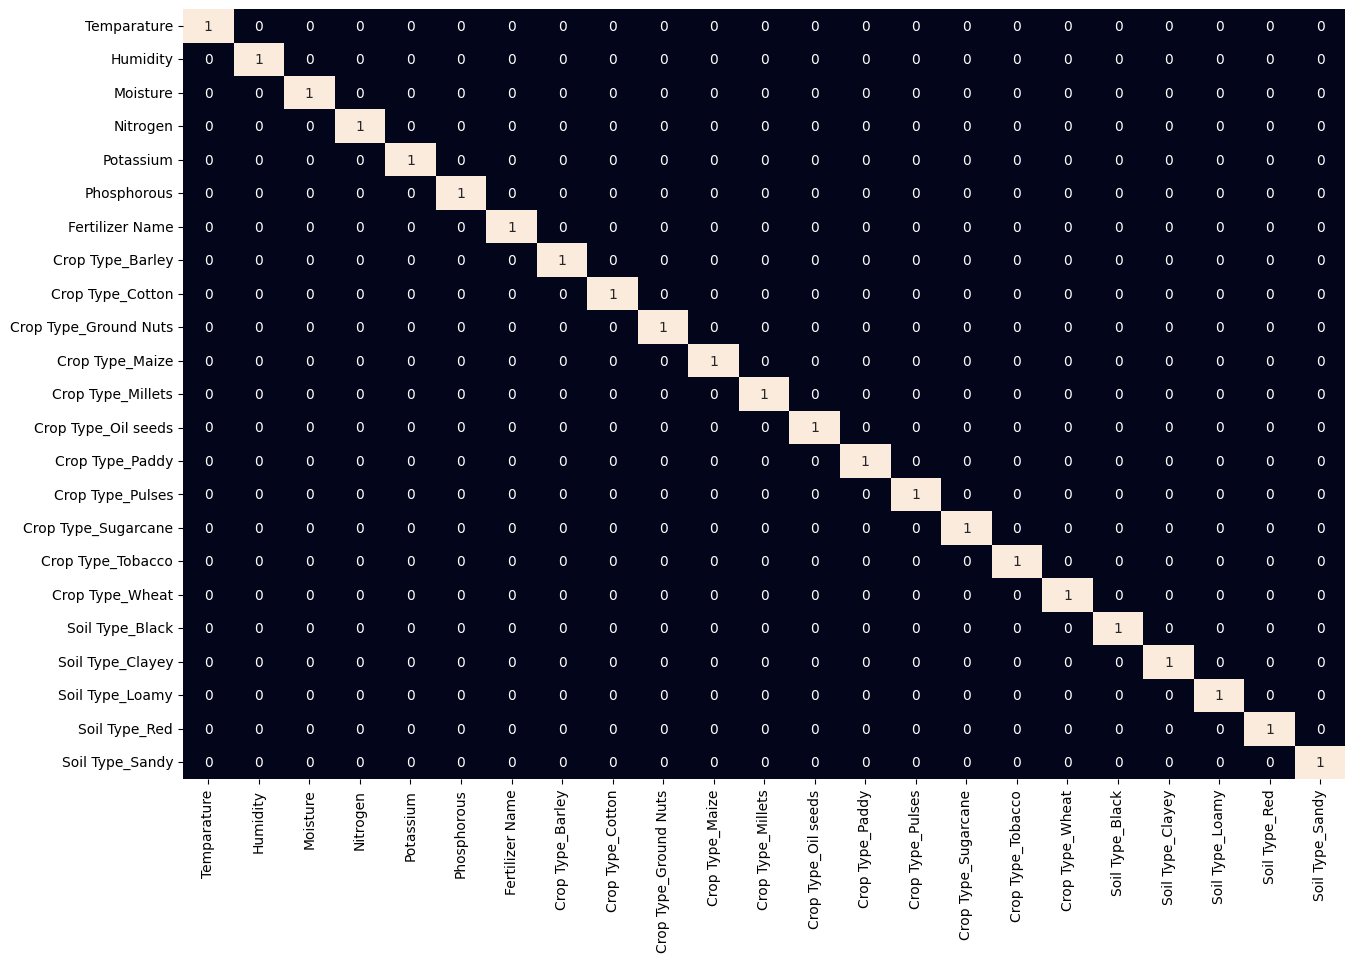

In [40]:
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr()>0.8, cbar=False, annot=True)
plt.show()

### **Model** **training**

In [41]:
features = df.drop('Fertilizer Name', axis=1)
target = df['Fertilizer Name']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.2,
                                                  random_state=10)

In [47]:
from sklearn.preprocessing import StandardScaler
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [48]:
def apk(actual, predicted, k=3):
    """Average precision at k for one sample."""
    if actual in predicted:
        return 1.0 / (predicted.index(actual) + 1)
    return 0.0

def mapk(y_true, y_pred_topk, k=3):
    """Mean average precision at k over all samples."""
    return np.mean([apk(a, p, k) for a, p in zip(y_true, y_pred_topk)])

In [49]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, Y_train)
y_train_pred = model.predict_proba(X_train)
y_val_pred = model.predict_proba(X_val)

In [50]:
top3_indices_train = np.argsort(y_train_pred, axis=1)[:, -3:][:, ::-1]
top3_indices_val = np.argsort(y_val_pred, axis=1)[:, -3:][:, ::-1]

In [51]:
train_map = mapk(Y_train, top3_indices_train.tolist())
val_map = mapk(Y_val, top3_indices_val.tolist())

print('MAP@3 Value for Training Data is :', train_map)
print('MAP@3 Value for Validation Data is :', val_map)

MAP@3 Value for Training Data is : 0.3992063888888888
MAP@3 Value for Validation Data is : 0.3317677777777778


### **TESTING**

In [52]:
test = pd.read_csv('test.csv')
test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [53]:
test.drop('id', axis=1, inplace=True)
test.shape

(250000, 8)

In [54]:
column_name=['Crop Type','Soil Type']
test = one_hot_encode(test,column_name)
test.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,31,70,52,34,11,24,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,27,62,45,30,14,15,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,28,72,28,14,15,4,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,37,53,57,18,17,36,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,31,55,32,13,19,14,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [55]:
preds = model.predict_proba(scaler.transform(test))
top3_indices_test = np.argsort(preds, axis=1)[:, -3:][:, ::-1]
top3_indices_test[:5]

array([[0, 3, 5],
       [1, 4, 2],
       [4, 2, 5],
       [5, 1, 6],
       [4, 2, 1]])

In [56]:
fert_dict_rev = {val:key for key, val in fert_dict.items()}
fert_dict_rev

{0: '28-28',
 1: '17-17-17',
 2: '10-26-26',
 3: 'DAP',
 4: '20-20',
 5: '14-35-14',
 6: 'Urea'}

In [58]:
top3_pred_labels = [[fert_dict_rev[val] for val in row] for row in top3_indices_test]
top3_pred_labels[:5]

[['28-28', 'DAP', '14-35-14'],
 ['17-17-17', '20-20', '10-26-26'],
 ['20-20', '10-26-26', '14-35-14'],
 ['14-35-14', '17-17-17', 'Urea'],
 ['20-20', '10-26-26', '17-17-17']]

In [59]:
final_pred = [' '.join(row) for row in top3_pred_labels]
final_pred[:5]

['28-28 DAP 14-35-14',
 '17-17-17 20-20 10-26-26',
 '20-20 10-26-26 14-35-14',
 '14-35-14 17-17-17 Urea',
 '20-20 10-26-26 17-17-17']

In [60]:
ss = pd.read_csv('sample_submission.csv')
ss['Fertilizer Name'] = final_pred
ss.head()

,id,Fertilizer Name
0,750000,28-28 DAP 14-35-14
1,750001,17-17-17 20-20 10-26-26
2,750002,20-20 10-26-26 14-35-14
3,750003,14-35-14 17-17-17 Urea
4,750004,20-20 10-26-26 17-17-17


In [61]:
ss.to_csv('Submission.csv', index=False)

In [62]:
!kaggle competitions submit -c playground-series-s5e6 -f Submission.csv -m "First Submission"

100% 6.93M/6.93M [00:00<00:00, 21.6MB/s]
Successfully submitted to Predicting Optimal Fertilizers